<a href="https://colab.research.google.com/github/mohamedyounis7/NSL-KDD-intrusion-detection/blob/main/NSL_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train_COMPETITION.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test_COMPETITION.csv")

In [ ]:
df = data.copy()

In [ ]:
df.head(5)

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,7060,0,tcp,smtp,SF,1129,327,0,0,0,...,1.00,0.00,0.14,0.02,0.0,0.04,0.0,0.01,21,0
1,22036,0,tcp,http,SF,242,2147,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
2,19555,0,tcp,http,SF,299,3991,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
3,11393,0,udp,domain_u,SF,43,133,0,0,0,...,1.00,0.01,0.00,0.00,0.0,0.00,0.0,0.00,21,0
4,22783,0,tcp,telnet,S0,0,0,0,0,0,...,0.14,0.19,0.05,0.00,0.1,0.67,0.0,0.00,4,0


In [ ]:
df.isnull().sum()


ID                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17251 entries, 0 to 17250
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           17251 non-null  int64  
 1   duration                     17251 non-null  int64  
 2   protocol_type                17251 non-null  object 
 3   service                      17251 non-null  object 
 4   flag                         17251 non-null  object 
 5   src_bytes                    17251 non-null  int64  
 6   dst_bytes                    17251 non-null  int64  
 7   land                         17251 non-null  int64  
 8   wrong_fragment               17251 non-null  int64  
 9   urgent                       17251 non-null  int64  
 10  hot                          17251 non-null  int64  
 11  num_failed_logins            17251 non-null  int64  
 12  logged_in                    17251 non-null  int64  
 13  num_compromised 

In [ ]:
df.describe()

,ID,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
count,17251.000000,17251.000000,1.725100e+04,1.725100e+04,17251.000000,17251.000000,17251.0,17251.000000,17251.000000,17251.000000,...,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000
mean,11453.391977,300.978958,3.107782e+04,3.531403e+03,0.000116,0.025274,0.0,0.184627,0.001101,0.388151,...,0.513184,0.083868,0.147851,0.031412,0.294951,0.289118,0.116886,0.118235,19.474291,0.478291
std,6632.391641,2646.007952,2.910731e+06,9.012346e+04,0.010767,0.268866,0.0,2.081791,0.043724,0.487343,...,0.449423,0.189233,0.309810,0.109439,0.449514,0.450570,0.304704,0.316774,2.327471,0.499543
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5720.500000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
50%,11409.000000,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.470000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
75%,17197.500000,0.000000,2.770000e+02,4.920000e+02,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,1.000000,0.070000,0.060000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,23001.000000,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,0.0,77.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


In [ ]:
df["Class"].value_counts()


0    9000
1    8251
Name: Class, dtype: int64

In [ ]:
df['Class'].unique()

array([0, 1])

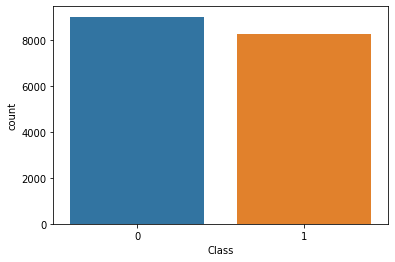

In [ ]:
sns.countplot(data=df,x="Class")

In [ ]:
df.corr()['Class'].sort_values(ascending=False)


Class                          1.000000
dst_host_srv_serror_rate       0.652767
serror_rate                    0.650716
dst_host_serror_rate           0.649940
srv_serror_rate                0.647874
count                          0.577098
dst_host_count                 0.365402
rerror_rate                    0.256324
dst_host_srv_rerror_rate       0.255330
srv_rerror_rate                0.254741
dst_host_rerror_rate           0.254257
dst_host_diff_srv_rate         0.232254
diff_srv_rate                  0.194161
wrong_fragment                 0.098179
dst_host_same_src_port_rate    0.087842
dst_host_srv_diff_host_rate    0.064507
duration                       0.044921
src_bytes                      0.006967
ID                             0.006950
num_failed_logins              0.005076
srv_count                      0.001926
land                           0.000468
dst_bytes                     -0.001722
hot                           -0.014067
num_shells                    -0.016303


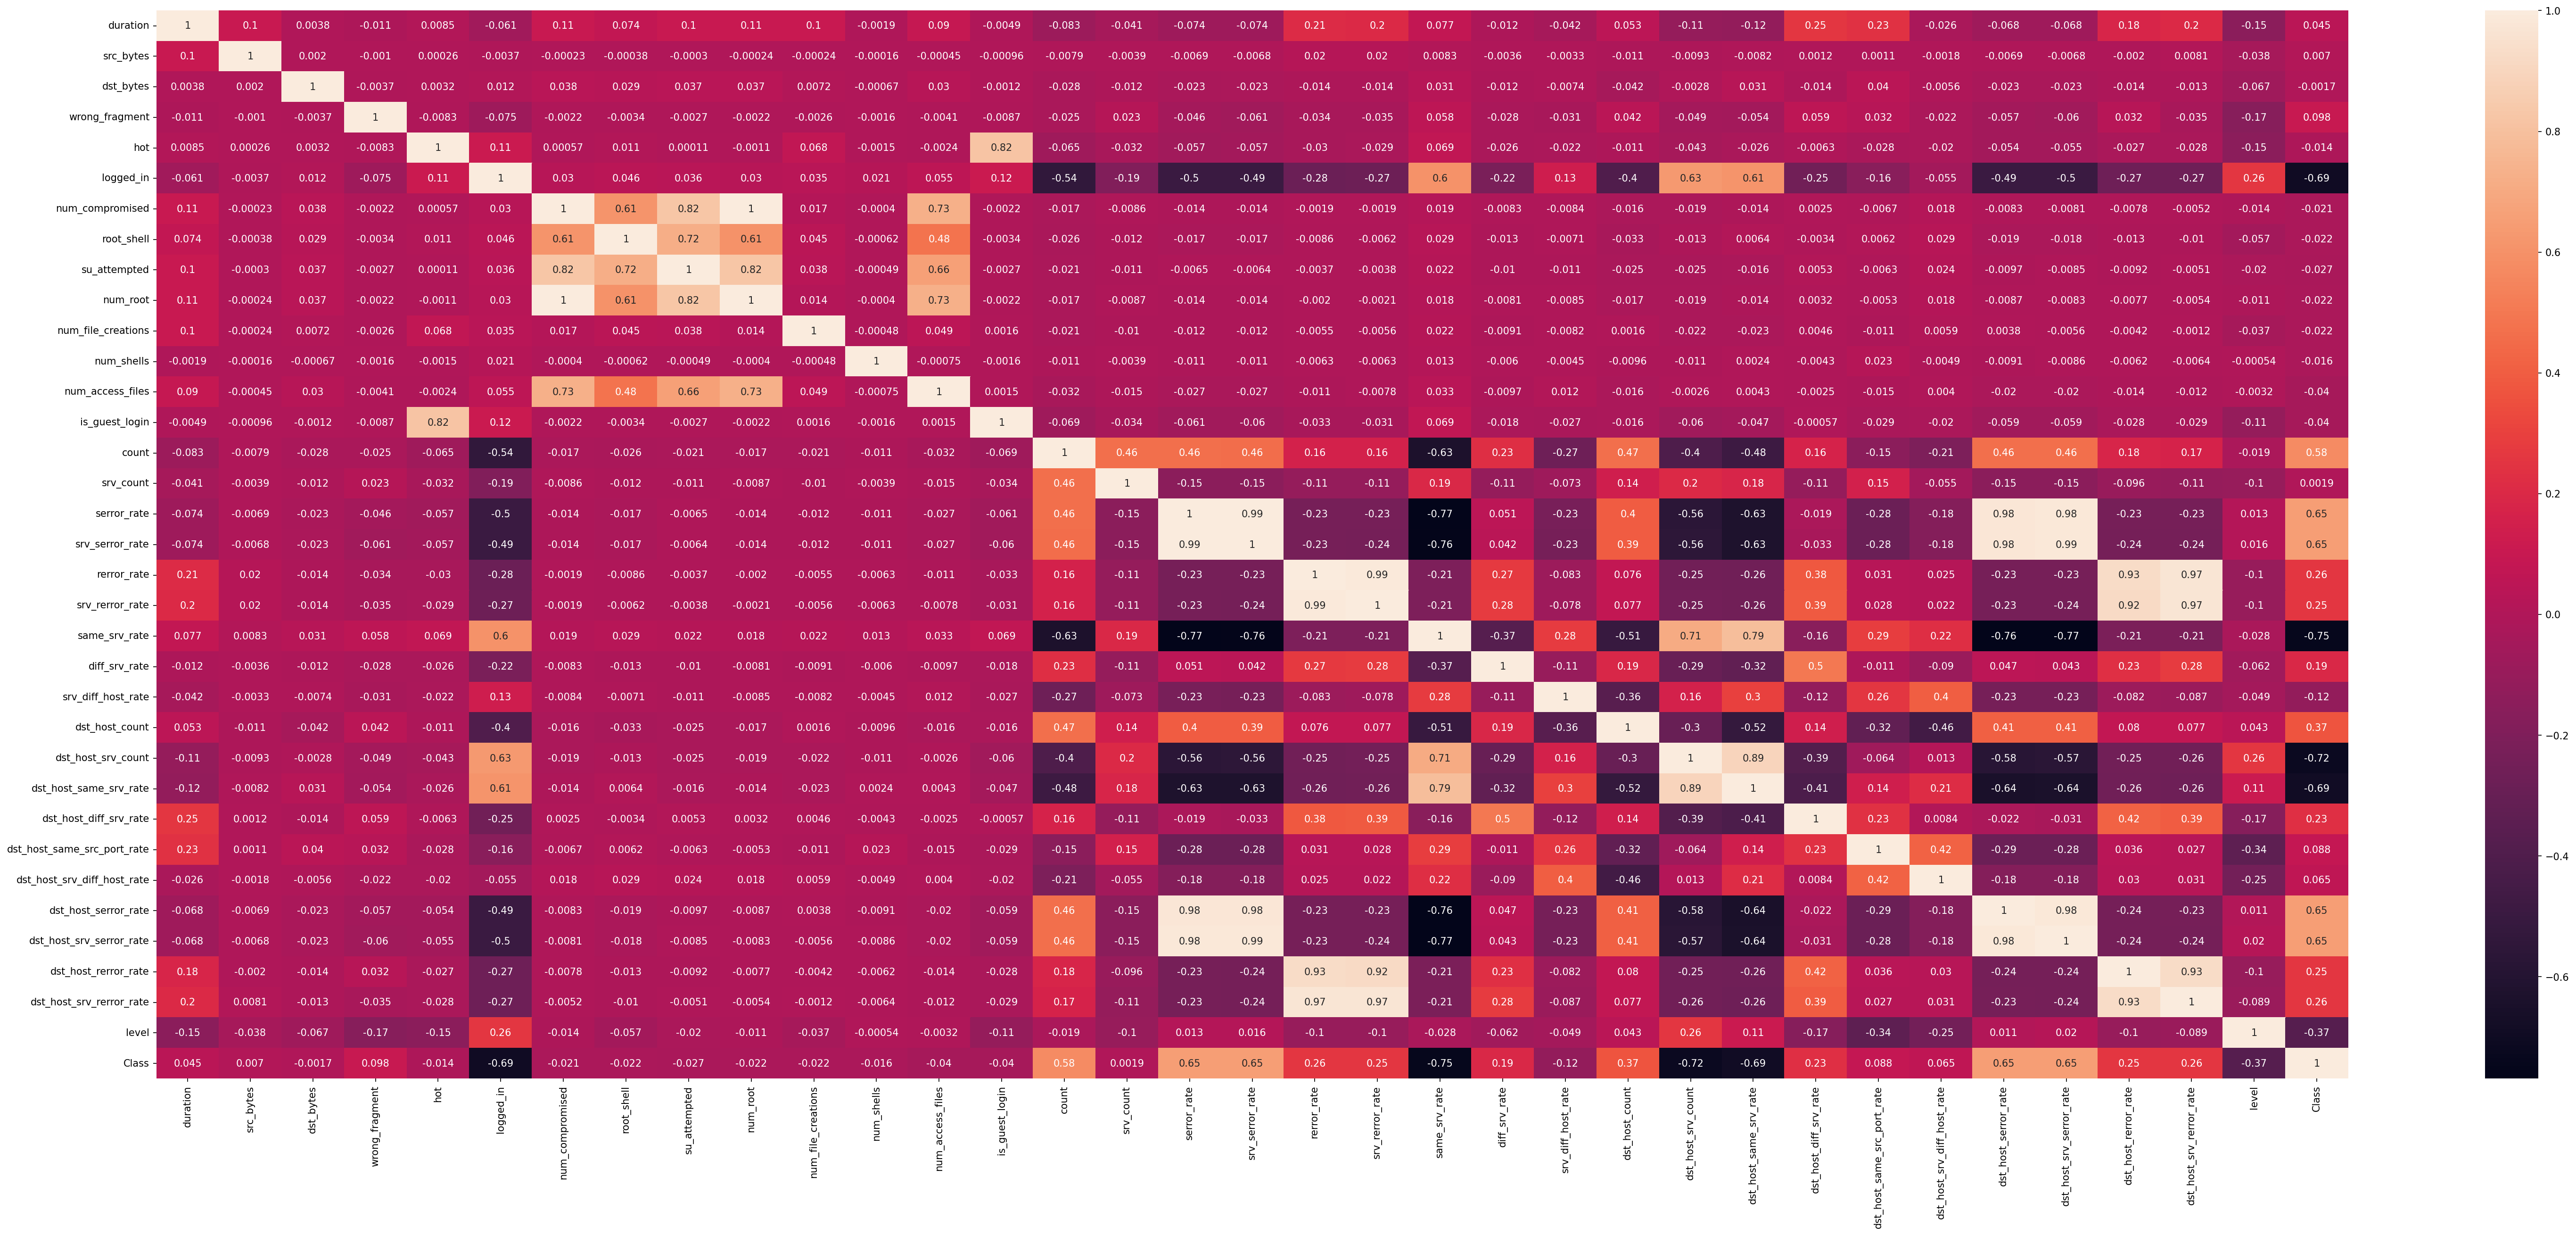

In [ ]:
plt.figure(figsize=(50,20), dpi=150)
sns.heatmap(df.corr(), annot=True)

In [ ]:
# dropping featuers has no correlation with the target
df.drop(["urgent","num_outbound_cmds","is_host_login"],axis=1, inplace= True)



In [ ]:
test_data.drop(["urgent","num_outbound_cmds","is_host_login"],axis=1, inplace= True)

In [ ]:
# droping some features with low correlation with target
df.drop(["land","ID","num_failed_logins"],axis=1, inplace= True)


In [ ]:
test_data.drop(["land","ID","num_failed_logins"],axis=1, inplace= True)

## data preprocessing



In [ ]:
from sklearn import preprocessing

In [ ]:

from sklearn.model_selection import train_test_split ,GridSearchCV


In [ ]:
#converting categorical_data to neumerical_data
categorical_data = df[["protocol_type" ,	"service"	, "flag"]]
neumerical_data= df.drop(categorical_data,axis=1)

In [ ]:
#test data
categorical_testdata = test_data[["protocol_type" ,	"service"	, "flag"]]
neumerical_testdata= test_data.drop(categorical_data,axis=1)

In [ ]:
lb = preprocessing.LabelEncoder()
label_encoder= categorical_data.apply(lb.fit_transform)

In [ ]:
#test data
lb_test = preprocessing.LabelEncoder()
label_testencoder= categorical_testdata.apply(lb_test.fit_transform)

In [ ]:
df_con =pd.concat([neumerical_data, label_encoder], axis=1)
df_con.head(2)

,duration,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class,protocol_type,service,flag
0,0,1129,327,0,0,1,0,0,0,0,...,0.02,0.0,0.04,0.0,0.01,21,0,1,51,9
1,0,242,2147,0,0,1,0,0,0,0,...,0.00,0.0,0.00,0.0,0.00,21,0,1,22,9


In [ ]:
#test
df_con_test =pd.concat([neumerical_testdata, label_testencoder], axis=1)

In [ ]:
#splitting the data into x and y
x = df_con.drop(["Class"],axis = 1 )

y = df_con["Class"]
print(x.shape)
print(y.shape)

(17251, 37)
(17251,)


In [ ]:
from sklearn.feature_selection import f_classif , SelectKBest
from sklearn.preprocessing import StandardScaler

In [ ]:
#feature selection using anova filter
anova_filter = SelectKBest(f_classif, k=25)
x_selected=anova_filter.fit(x, y)
cols = x_selected.get_support(indices=True)
x= x.iloc[:,cols]


In [ ]:
#test
test1 = df_con_test.iloc[:,cols]
test1.head()


,duration,wrong_fragment,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,protocol_type,service,flag
0,0,0,0,1,0.0,0.0,1.0,1.0,1.0,0.0,...,0.09,0.01,0.0,0.0,1.0,0.07,21,1,22,1
1,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.33,0.05,0.0,0.0,0.0,0.00,20,1,19,9
2,0,0,0,20,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.00,21,2,11,9
3,0,0,1,7,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.01,0.0,0.0,0.0,0.00,21,1,22,9
4,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.20,0.02,0.0,0.0,0.0,0.00,21,1,49,9


In [ ]:
# splitting the data int train and test
X_train ,X_test , Y_train , Y_test = train_test_split(x,y , test_size= .3 , random_state=42)


In [ ]:
#feature scaling 
scale =StandardScaler()
X_train = scale.fit_transform(X_train)
X_test =scale.transform(X_test)

In [ ]:
#test
scale_test = StandardScaler()
test1 = scale_test.fit_transform(test1)
test1


array([[-0.11450553, -0.08706604, -0.78566315, ..., -0.14053742,
        -0.44014983, -2.18412733],
       [-0.11450553, -0.08706604, -0.78566315, ..., -0.14053742,
        -0.64186325,  0.77025277],
       [-0.11450553, -0.08706604, -0.78566315, ...,  2.18865762,
        -1.1797657 ,  0.77025277],
       ...,
       [-0.11450553, -0.08706604, -0.78566315, ..., -0.14053742,
        -0.44014983, -0.70693728],
       [-0.11450553, -0.08706604,  1.2728101 , ..., -0.14053742,
        -0.44014983,  0.77025277],
       [-0.11450553, -0.08706604, -0.78566315, ..., -0.14053742,
         1.64422215, -0.70693728]])

In [ ]:
#validation 
X_train1 ,X_test1 , Y_train1 , Y_test1 = train_test_split(X_train ,Y_train , test_size= .3 , random_state=42)

##Create model

In [ ]:
from sklearn import datasets
from sklearn import metrics
import xgboost as xgb

In [ ]:
#using gridsearch to tune hyper parameters of xgboost Model
from sklearn.model_selection import GridSearchCV
parameters= {"eta" : [.33 , .20 ,.40], "max_depth" : [1,2,3,4,5,6] }


In [ ]:
model = xgb.XGBClassifier()
clf = GridSearchCV(model, parameters,cv=5 , scoring="f1_macro")
clf.fit(X_train1,Y_train1)



GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'eta': [0.33, 0.2, 0.4],
                         'max_depth': [1, 2, 3, 4, 5, 6]},
             scoring='f1_macro')

In [ ]:
clf.best_params_

{'eta': 0.33, 'max_depth': 5}

In [ ]:
clf.best_score_

0.9966796395894049

In [ ]:
#making XGBOOST model with the best paramaters
model1 = xgb.XGBClassifier(eta=.33 , max_depth=5)
model1.fit(X_train1, Y_train1)
y_predict= model1.predict(X_test)
print(metrics.classification_report(Y_test, y_predict))
print(metrics.confusion_matrix(Y_test, y_predict))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2704
           1       0.99      1.00      1.00      2472

    accuracy                           1.00      5176
   macro avg       1.00      1.00      1.00      5176
weighted avg       1.00      1.00      1.00      5176

[[2686   18]
 [   1 2471]]


In [ ]:
#Final prediction

final_y = model1.predict(test1)


In [ ]:
final_y

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
finalpredictions = pd.DataFrame(final_y).to_csv('/content/drive/My Drive/test_preds.csv')

In [ ]:
#KNN'
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn= KNeighborsClassifier()


In [ ]:
# USing elbow method to get best parameters
test= []

for k in range(1,40):
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train1,Y_train1)
  y_pred = knn.predict(X_test1)
  test_error = 1- metrics.accuracy_score(Y_test1,y_pred)
  test.append(test_error)


Text(0.5, 0, 'K Value')

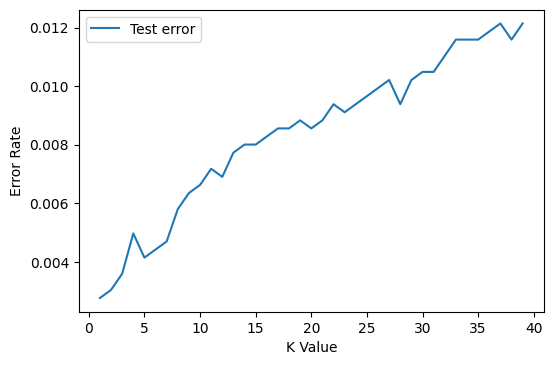

In [ ]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,40),test,label = "Test error")
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_model.fit(X_train1,Y_train1) 

KNeighborsClassifier()

In [ ]:
y_pred1 = knn_model.predict(X_test)

In [ ]:
metrics.confusion_matrix(Y_test, y_pred1) 

array([[2677,   27],
       [   3, 2469]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


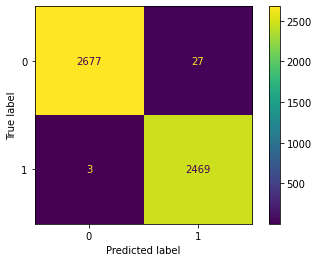

In [ ]:
metrics.plot_confusion_matrix(knn_model, X_test, Y_test)

In [ ]:
print(metrics.classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2704
           1       0.99      1.00      0.99      2472

    accuracy                           0.99      5176
   macro avg       0.99      0.99      0.99      5176
weighted avg       0.99      0.99      0.99      5176



In [ ]:
final_yknn = knn_model.predict(test1)

In [ ]:
final_yknn

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
finalpredictions = pd.DataFrame(final_yknn).to_csv('/content/drive/My Drive/testKnn_preds.csv')

In [ ]:
#decision Tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train1, Y_train1)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
final_score= grid_search.best_estimator_
final_score

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)

In [ ]:
tree_clas = DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       random_state=1024)
tree_clas.fit(X_train1, Y_train1)
y_predict = tree_clas.predict(X_test)

In [ ]:
print(metrics.classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2704
           1       0.98      0.98      0.98      2472

    accuracy                           0.98      5176
   macro avg       0.98      0.98      0.98      5176
weighted avg       0.98      0.98      0.98      5176

